<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/implementation_1_SOC_LSTM_CALCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx')

In [ ]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,TEST REPORT,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,12_2_SP20-13_OCV-SOC_PULSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\ArbinSoftware\MITS_PRO\Data\12_2_SP20-13_OC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2015-12-04 00:00:00,NaN,NaN,NaN,Mapped_Aux_Number,NaN,NaN,NaN,NaN,Log_Data_Flag,NaN,NaN,NaN,Cell Grading,NaN,NaN,Concentration,Digital I/O,NaN,NaN
2,Channel,Start_DateTime,Schedule_File_Name,Creator,Comments,Chan_Num,Item_ID,Volt,Temp,Pres,PH,FR,ChanStat,Aux,SmartBty,Event,Grade,Internal_Resistance(Ohm),Discharge_Capacity(Ah),Concentration,Digital Input,Digital Output,Related Humidity
3,1-005,2015-12-02 10:08:38,SP20_0.1SOC_0.5C.sdu,NaN,ch5_sp20-1_x000D_\nch6_sp20-3,16,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN
4,1-006,2015-12-02 10:08:38,SP20_0.1SOC_0.5C.sdu,NaN,ch5_sp20-1_x000D_\nch6_sp20-3,16,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN


In [ ]:
df.shape

(5, 23)

In [6]:
ws1 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 1)
ws2 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 2)
ws3 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 3)


In [7]:
combined_data=ws1.append(ws2,ignore_index=True).append(ws3,ignore_index=True)
combined_data.shape

(142121, 19)

In [ ]:
combined_data

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SoC,Charge_Energy(Wh),Discharge_Energy(Wh),SoC.1,dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,10.000167,2015-12-02 10:08:48,10.000168,1,1,0.000000,4.166209,0.000000,0.000000,0.925672,0.000000,0.000000,0.925672,0.000000,0,0,0,0
1,2,20.015713,2015-12-02 10:08:58,20.015714,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,0.925582,-0.000032,0,0,0,0
2,3,30.031239,2015-12-02 10:09:08,30.031240,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,0.925582,-0.000032,0,0,0,0
3,4,40.046793,2015-12-02 10:09:18,40.046793,1,1,0.000000,4.166209,0.000000,0.000000,0.925672,0.000000,0.000000,0.925672,0.000032,0,0,0,0
4,5,50.062341,2015-12-02 10:09:28,50.062342,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,0.925582,-0.000032,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142116,142115,150503.768645,2015-12-04 03:57:09,272.779350,9,18,0.999544,4.249022,1.691192,1.987336,0.971679,6.644591,6.892068,NaN,0.000162,0,0,0,0
142117,142116,150504.768729,2015-12-04 03:57:10,273.779434,9,18,0.999364,4.249184,1.691470,1.987336,0.971769,6.645771,6.892068,NaN,0.000162,0,0,0,0
142118,142117,150505.784258,2015-12-04 03:57:11,274.794963,9,18,0.999544,4.249508,1.691752,1.987336,0.971949,6.646969,6.892068,NaN,0.000162,0,0,0,0
142119,142118,150506.784411,2015-12-04 03:57:12,275.795116,9,18,0.999544,4.249671,1.692029,1.987336,0.972039,6.648149,6.892068,NaN,0.000162,0,0,0,0


In [8]:
combined_data=combined_data.drop(columns=['SoC.1'])

In [9]:
combined_data.describe()

,Data_Point,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SoC,Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
count,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.000000,142121.0,142121.0,142121.0,142121.0
mean,71060.350750,78706.392361,3301.113778,7.770175,9.029130,-0.007765,3.684209,0.412341,1.481360,0.657894,1.589246,5.207026,0.000002,0.0,0.0,0.0,0.0
std,41026.359223,41479.760320,2192.912020,1.984790,4.802599,0.303028,0.207374,0.539745,0.625662,0.115208,2.090087,2.114297,0.001058,0.0,0.0,0.0,0.0
min,1.000000,10.000167,0.000005,1.000000,1.000000,-1.000233,2.499903,0.000000,0.000000,-0.000054,0.000000,0.000000,-0.048326,0.0,0.0,0.0,0.0
25%,35531.000000,42831.669001,1251.397393,6.000000,5.000000,0.000000,3.577119,0.016146,0.999809,0.598400,0.067824,3.647907,-0.000032,0.0,0.0,0.0,0.0
50%,71060.000000,78729.254299,3234.680500,6.000000,9.000000,0.000000,3.661715,0.016146,1.799699,0.645397,0.067824,6.317823,0.000000,0.0,0.0,0.0,0.0
75%,106590.000000,114618.079463,5217.744364,10.000000,13.000000,0.000000,3.839495,0.815788,1.987336,0.744164,3.102921,6.892068,0.000032,0.0,0.0,0.0,0.0
max,142119.000000,150507.800260,7200.013696,10.000000,18.000000,0.999904,4.249832,1.692307,1.987336,0.972129,6.649329,6.892068,0.082230,0.0,0.0,0.0,0.0


In [ ]:
combined_data.to_csv('merged0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('merged0.csv')

**63990, 127979 are repeated in datapoints**

In [10]:
combined_data=combined_data.drop_duplicates(subset=['Data_Point'])
combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [11]:
combined_data.shape
combined_data

,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SoC,Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
Data_Point,,,,,,,,,,,,,,,,,
1,10.000167,2015-12-02 10:08:48,10.000168,1,1,0.000000,4.166209,0.000000,0.000000,0.925672,0.000000,0.000000,0.000000,0,0,0,0
2,20.015713,2015-12-02 10:08:58,20.015714,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,-0.000032,0,0,0,0
3,30.031239,2015-12-02 10:09:08,30.031240,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,-0.000032,0,0,0,0
4,40.046793,2015-12-02 10:09:18,40.046793,1,1,0.000000,4.166209,0.000000,0.000000,0.925672,0.000000,0.000000,0.000032,0,0,0,0
5,50.062341,2015-12-02 10:09:28,50.062342,1,1,0.000000,4.166047,0.000000,0.000000,0.925582,0.000000,0.000000,-0.000032,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142115,150503.768645,2015-12-04 03:57:09,272.779350,9,18,0.999544,4.249022,1.691192,1.987336,0.971679,6.644591,6.892068,0.000162,0,0,0,0
142116,150504.768729,2015-12-04 03:57:10,273.779434,9,18,0.999364,4.249184,1.691470,1.987336,0.971769,6.645771,6.892068,0.000162,0,0,0,0
142117,150505.784258,2015-12-04 03:57:11,274.794963,9,18,0.999544,4.249508,1.691752,1.987336,0.971949,6.646969,6.892068,0.000162,0,0,0,0


In [ ]:
combined_data.to_csv('cd.csv')
files.download('cd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
display(combined_data.loc[63990])


Test_Time(s)                            71585.2
Date_Time                   2015-12-03 06:01:47
Step_Time(s)                            510.184
Step_Index                                    5
Cycle_Index                                   9
Current(A)                            -0.999873
Voltage(V)                              3.23388
Charge_Capacity(Ah)                   0.0161462
Discharge_Capacity(Ah)                  1.74142
SoC                                    0.407708
Charge_Energy(Wh)                     0.0678237
Discharge_Energy(Wh)                    6.13017
dV/dt(V/s)                         -0.000129652
Internal_Resistance(Ohm)                      0
Is_FC_Data                                    0
AC_Impedance(Ohm)                             0
ACI_Phase_Angle(Deg)                          0
Name: 63990, dtype: object

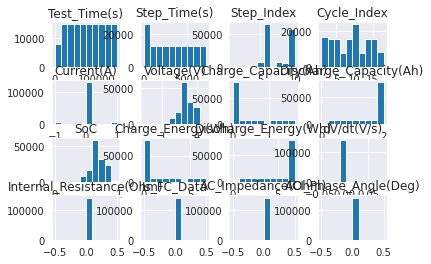

<Figure size 1440x1440 with 0 Axes>

In [13]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb82ee8310>,
      dtype=object)

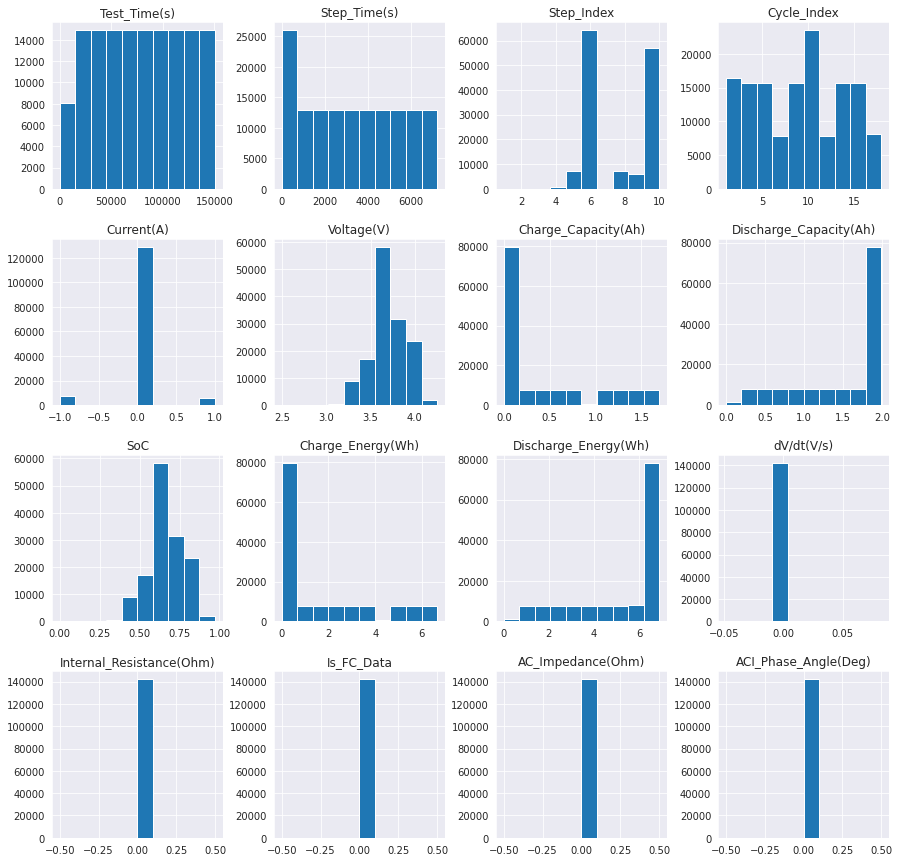

In [14]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

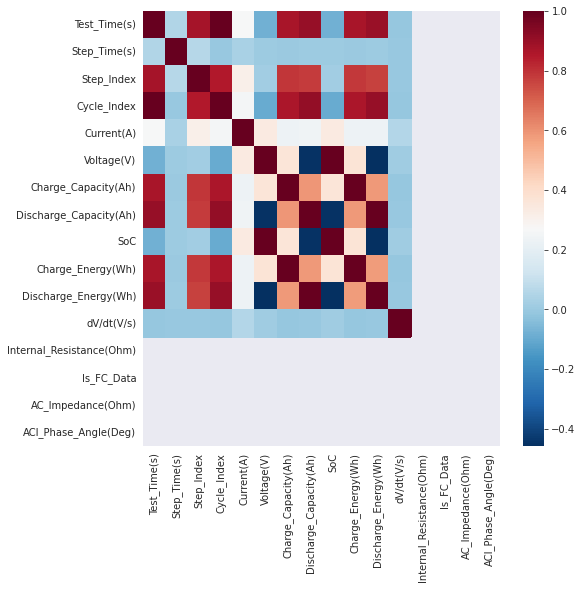

In [15]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [16]:
combined_data.describe()

,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SoC,Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
count,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.0,142119.0,142119.0,142119.0
mean,78706.037752,3301.148810,7.770179,9.029081,-0.007758,3.684211,0.412337,1.481354,0.657895,1.589229,5.207008,0.000002,0.0,0.0,0.0,0.0
std,41479.767284,2192.907274,1.984781,4.802597,0.303019,0.207371,0.539741,0.625664,0.115206,2.090072,2.114306,0.001058,0.0,0.0,0.0,0.0
min,10.000167,0.000005,1.000000,1.000000,-1.000233,2.499903,0.000000,0.000000,-0.000054,0.000000,0.000000,-0.048326,0.0,0.0,0.0,0.0
25%,42831.169001,1251.741121,6.000000,5.000000,0.000000,3.577119,0.016146,0.999809,0.598400,0.067824,3.647907,-0.000032,0.0,0.0,0.0,0.0
50%,78729.254299,3234.695696,6.000000,9.000000,0.000000,3.661715,0.016146,1.799699,0.645397,0.067824,6.317823,0.000000,0.0,0.0,0.0,0.0
75%,114617.571635,5217.752799,10.000000,13.000000,0.000000,3.839495,0.815788,1.987336,0.744164,3.102921,6.892068,0.000032,0.0,0.0,0.0,0.0
max,150507.800260,7200.013696,10.000000,18.000000,0.999904,4.249832,1.692307,1.987336,0.972129,6.649329,6.892068,0.082230,0.0,0.0,0.0,0.0


Deleting 0 valued columns

In [ ]:
combined_data=combined_data.drop(columns=['Internal_Resistance(Ohm)','Is_FC_Data','AC_Impedance(Ohm)',	'ACI_Phase_Angle(Deg)'])
combined_data.describe()

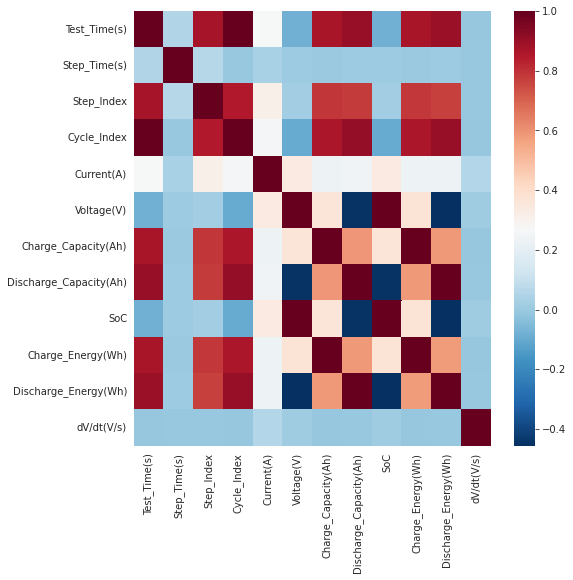

In [20]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8440ab50>,
      dtype=object)

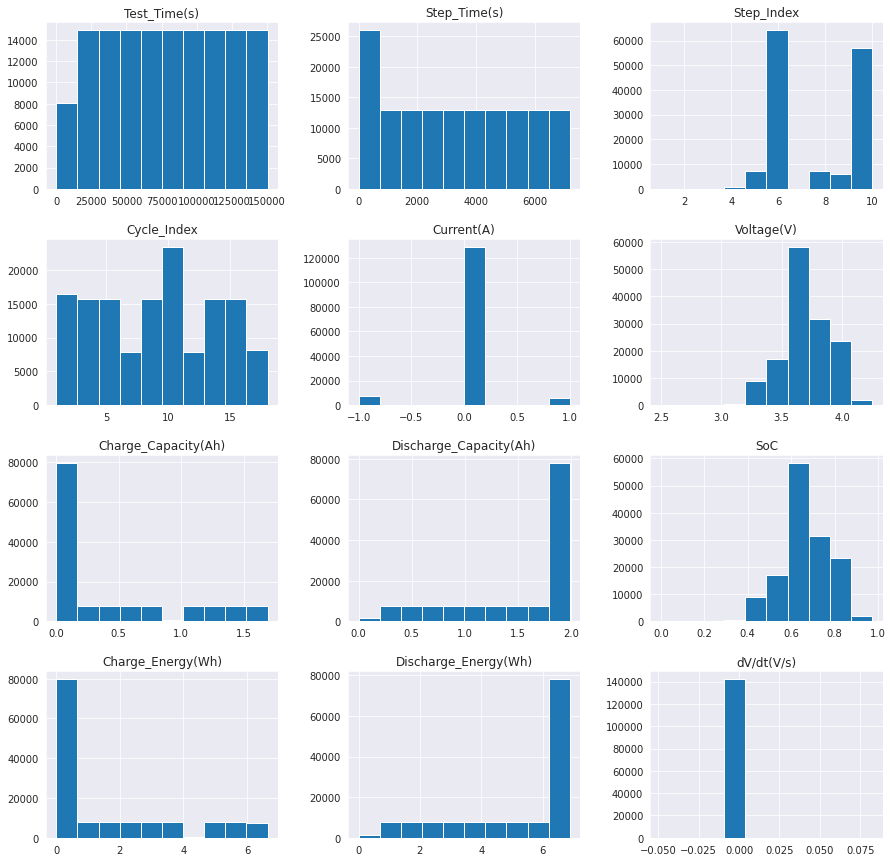

In [21]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

In [32]:
cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=cd2.drop_duplicates(subset=['Data_Point'])
cd2.describe()

,Data_Point,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SoC,Charge_Energy(Wh),Discharge_Energy(Wh)
count,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000
mean,71060.000000,78706.037752,9.029081,-0.007758,3.684211,0.412337,1.481354,0.657895,1.589229,5.207008
std,41026.365791,41479.767284,4.802597,0.303019,0.207371,0.539741,0.625664,0.115206,2.090072,2.114306
min,1.000000,10.000167,1.000000,-1.000233,2.499903,0.000000,0.000000,-0.000054,0.000000,0.000000
25%,35530.500000,42831.169000,5.000000,0.000000,3.577119,0.016146,0.999809,0.598400,0.067824,3.647907
50%,71060.000000,78729.254300,9.000000,0.000000,3.661715,0.016146,1.799699,0.645397,0.067824,6.317823
75%,106589.500000,114617.571650,13.000000,0.000000,3.839495,0.815788,1.987336,0.744164,3.102921,6.892068
max,142119.000000,150507.800300,18.000000,0.999904,4.249832,1.692307,1.987336,0.972129,6.649329,6.892068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8368c6d0>,
      dtype=object)

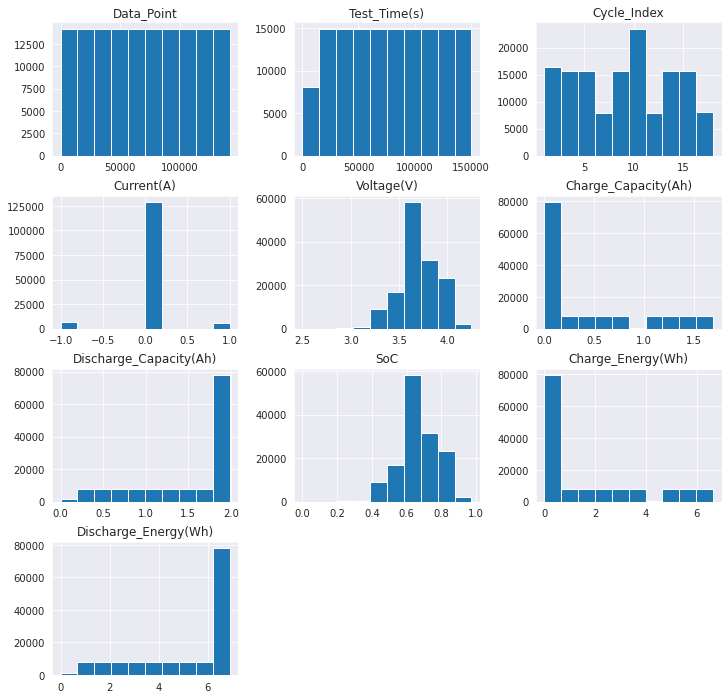

In [34]:
  fig = plt.figure(figsize = (12,12))
  ax = fig.gca()
  cd2.hist(ax = ax)

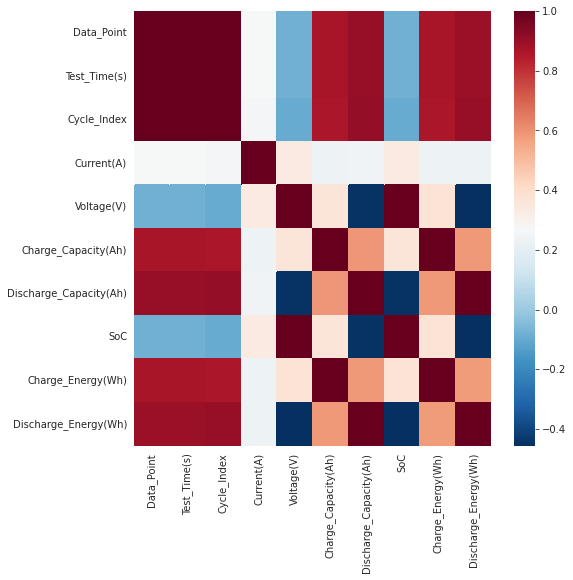

In [35]:
correlations = cd2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [304]:
y = cd2.SoC
X = cd2.drop(['Data_Point','SoC'], axis=1)

In [305]:
X

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh)
0,10.000167,1,0.000000,4.166209,0.000000,0.000000,0.000000,0.000000
1,20.015713,1,0.000000,4.166047,0.000000,0.000000,0.000000,0.000000
2,30.031239,1,0.000000,4.166047,0.000000,0.000000,0.000000,0.000000
3,40.046793,1,0.000000,4.166209,0.000000,0.000000,0.000000,0.000000
4,50.062341,1,0.000000,4.166047,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
142114,150503.768600,18,0.999544,4.249022,1.691192,1.987336,6.644591,6.892068
142115,150504.768700,18,0.999364,4.249184,1.691470,1.987336,6.645771,6.892068
142116,150505.784300,18,0.999544,4.249508,1.691752,1.987336,6.646969,6.892068
142117,150506.784400,18,0.999544,4.249671,1.692029,1.987336,6.648149,6.892068


In [330]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 11) 

In [331]:
X_train

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh)
83260,91053.26463,10,0.0,3.482638,0.216053,1.987336,0.804928,6.892068
50137,57588.92842,7,0.0,3.596404,0.016146,1.399749,0.067824,5.000753
57930,65462.65505,8,0.0,3.552648,0.016146,1.599724,0.067824,5.666128
96499,104424.91820,12,0.0,3.613421,0.615873,1.987336,2.325117,6.892068
49181,56622.82568,7,0.0,3.593325,0.016146,1.399749,0.067824,5.000753
...,...,...,...,...,...,...,...,...
102327,110313.32980,12,0.0,3.610504,0.615873,1.987336,2.325117,6.892068
97617,105554.58220,12,0.0,3.612124,0.615873,1.987336,2.325117,6.892068
21584,28742.77721,3,0.0,3.839333,0.016146,0.599871,0.067824,2.251306
36543,43855.14643,5,0.0,3.664146,0.016146,0.999809,0.067824,3.647907


In [332]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [333]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Creating Instance of StandarScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#Perform scaling in X_train with fit_transform.
#Here we are applying fit_transform because,
        # fit will calculate mean and standard deviation of X_train
        # transform will actually perform scaling with calculated mean and std.
        # fit_transform method does this both thing in one line of code.
X_train1 = scaler.fit_transform(X_train)

# Here we will only use transform because we have already calculated mean and std.
# Another reason is we don't want to know the mean and std of our test dataset As it
# Lead to information leakage.
X_test1 = scaler.transform(X_test)

In [334]:
X_test1.shape

(42636, 8)

In [335]:
a1=X_train1.shape[0]
a2=X_train1.shape[1]
a3=X_test1.shape[0]
a4=X_test1.shape[1]

In [336]:
X_train1

array([[0.60495156, 0.52941176, 0.50008222, ..., 1.        , 0.12107558,
        1.        ],
       [0.38259242, 0.35294118, 0.50008222, ..., 0.70433413, 0.01020189,
        0.725581  ],
       [0.43491065, 0.41176471, 0.50008222, ..., 0.80495919, 0.01020189,
        0.82212311],
       ...,
       [0.19091954, 0.11764706, 0.50008222, ..., 0.301847  , 0.01020189,
        0.32665175],
       [0.2913361 , 0.23529412, 0.50008222, ..., 0.50309009, 0.01020189,
        0.52929068],
       [0.99390948, 0.94117647, 0.50008222, ..., 1.        , 0.95138796,
        1.        ]])

In [337]:
# reshape input to be [samples, time steps, features]
X_train2 = np.reshape(X_train1, (a1, 1, a2))
X_test2 = np.reshape(X_test1, (a3,1, a4))

In [338]:
X_train2.shape

(99483, 1, 8)

In [339]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [340]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train2.shape[1], X_train2.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train2, y_train, epochs=20, batch_size=35, validation_data=(X_test2, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
2843/2843 [==============================] - 14s 4ms/step - loss: 0.0052 - val_loss: 1.6418e-04
Epoch 2/20
2843/2843 [==============================] - 11s 4ms/step - loss: 6.2502e-04 - val_loss: 9.3767e-05
Epoch 3/20
2843/2843 [==============================] - 11s 4ms/step - loss: 2.3598e-04 - val_loss: 2.0687e-05
Epoch 4/20
2843/2843 [==============================] - 11s 4ms/step - loss: 6.7892e-05 - val_loss: 2.5704e-05
Epoch 5/20
2843/2843 [==============================] - 10s 3ms/step - loss: 4.1514e-05 - val_loss: 9.3065e-07
Epoch 6/20
2843/2843 [==============================] - 11s 4ms/step - loss: 3.9876e-05 - val_loss: 1.1602e-06
Epoch 7/20
2843/2843 [==============================] - 11s 4ms/step - loss: 3.8080e-05 - val_loss: 4.7470e-06
Epoch 8/20
2843/2843 [==============================] - 11s 4ms/step - loss: 3.8246e-05 - val_loss: 2.9838e-06
Epoch 9/20
2843/2843 [==============================] - 11s 4ms/step - loss: 3.7736e-05 - val_loss: 9.3321e-06
Epoch

In [341]:
# make predictions
train_predict = model.predict(X_train2)
test_predict = model.predict(X_test2)

In [342]:
train_predict.shape

(99483, 1)

In [343]:
y_train.shape

(99483,)

In [344]:
z = np.zeros((train_predict.shape[0],7), dtype=np.int64)
train_predict2=np.append(train_predict, z, axis=1)
train_predict2.shape

z = np.zeros((test_predict.shape[0],7), dtype=np.int64)
test_predict2=np.append(test_predict, z, axis=1)
test_predict2.shape

(42636, 8)

In [346]:
# invert predictions

train_predict3 = scaler.inverse_transform(train_predict2)
#y_train = scaler.inverse_transform([y_train])
test_predict3 = scaler.inverse_transform(test_predict2)
#y_test = scaler.inverse_transform([y_test])

In [347]:
train_predict3[:,0]

array([ 82415.43274671,  91840.0323569 ,  88208.78017347, ...,
       112183.10171414,  97552.58422523, 121015.51751338])

In [348]:
y_train3=y_train.to_numpy()
y_train3
y_test3=y_test.to_numpy()
y_test3

array([0.63207216, 0.42418453, 0.70184814, ..., 0.69590595, 0.74965609,
       0.70166813])

In [349]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train3, train_predict3[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train3, train_predict3[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test3, test_predict3[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test3, test_predict3[:,0])))

Train Mean Absolute Error: 99166.72884325754
Train Root Mean Squared Error: 100669.46234696072
Test Mean Absolute Error: 99180.0586294595
Test Root Mean Squared Error: 100659.26117153373


In [357]:
y_test3[1:5]

array([0.42418453, 0.70184814, 0.61028401, 0.74407392])

In [363]:
test_predict3.shape


(42636, 8)

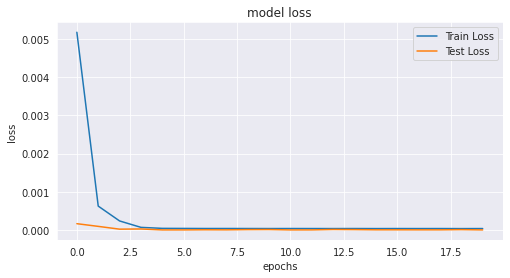

In [352]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

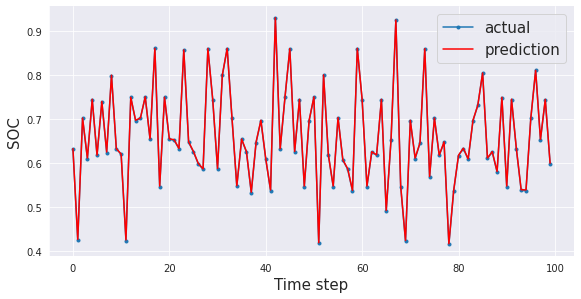

In [354]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test3[:100], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:100], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();